In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os

# For display settings
pd.set_option('display.max_columns', None)

In [2]:
file_path = r"C:\Users\tanzi\Personal Projects\Market-Basket-Analysis\data\cleaned_transactions.zip"

# Opening and loading the zipped file (cleaned)
with zipfile.ZipFile(file_path, 'r') as z:
    with z.open('cleaned_transactions.csv') as f:
        df = pd.read_csv(f)

df.head()

,transaction_id,date,customer_name,product,total_items,total_cost,payment_method,city,store_type,discount_applied,customer_category,season,promotion,year,month,day_of_week,hour
0,1000000000,2022-01-21 06:27:29,Stacey Price,"['Ketchup', 'Shaving Cream', 'Light Bulbs']",3,71.65,Mobile Payment,Los Angeles,Warehouse Club,True,Homemaker,Winter,NaN,2022,1,Friday,6
1,1000000001,2023-03-01 13:01:21,Michelle Carlson,"['Ice Cream', 'Milk', 'Olive Oil', 'Bread', 'P...",2,25.93,Cash,San Francisco,Specialty Store,True,Professional,Fall,BOGO (Buy One Get One),2023,3,Wednesday,13
2,1000000002,2024-03-21 15:37:04,Lisa Graves,['Spinach'],6,41.49,Credit Card,Houston,Department Store,True,Professional,Winter,NaN,2024,3,Thursday,15
3,1000000003,2020-10-31 09:59:47,Mrs. Patricia May,"['Tissues', 'Mustard']",1,39.34,Mobile Payment,Chicago,Pharmacy,True,Homemaker,Spring,NaN,2020,10,Saturday,9
4,1000000004,2020-12-10 00:59:59,Susan Mitchell,['Dish Soap'],10,16.42,Debit Card,Houston,Specialty Store,False,Young Adult,Winter,Discount on Selected Items,2020,12,Thursday,0


In [3]:
# Checking the type of "product"
print(df["product"].apply(type).unique())

[<class 'str'>]


In [4]:
# Converting it to list again
import ast

df["product"] = df["product"].apply(ast.literal_eval)

print(df["product"].apply(type).unique())

[<class 'list'>]


In [5]:
from collections import Counter

# Flattens all product lists into a single list
# Sample : ['Apple', 'Banana', 'Apple', 'Orange', 'Banana', 'Grapes']
all_products = [product for sublist in df["product"] for product in sublist]

# Counting occurrences of each product for example how many time does apple appear the all_product list
product_counts = Counter(all_products)

product_df = pd.DataFrame(product_counts.items(), columns=["product", "count"]).sort_values(by="count", ascending=False)
# Top 10 most bought products
product_df.head(10)

,product,count
12,Toothpaste,73324
3,Ice Cream,37094
24,Soap,37076
78,Jam,36956
73,Orange,36928
16,Soda,36924
67,Deodorant,36910
72,Cleaning Rags,36870
41,Air Freshener,36846
51,Peanut Butter,36818


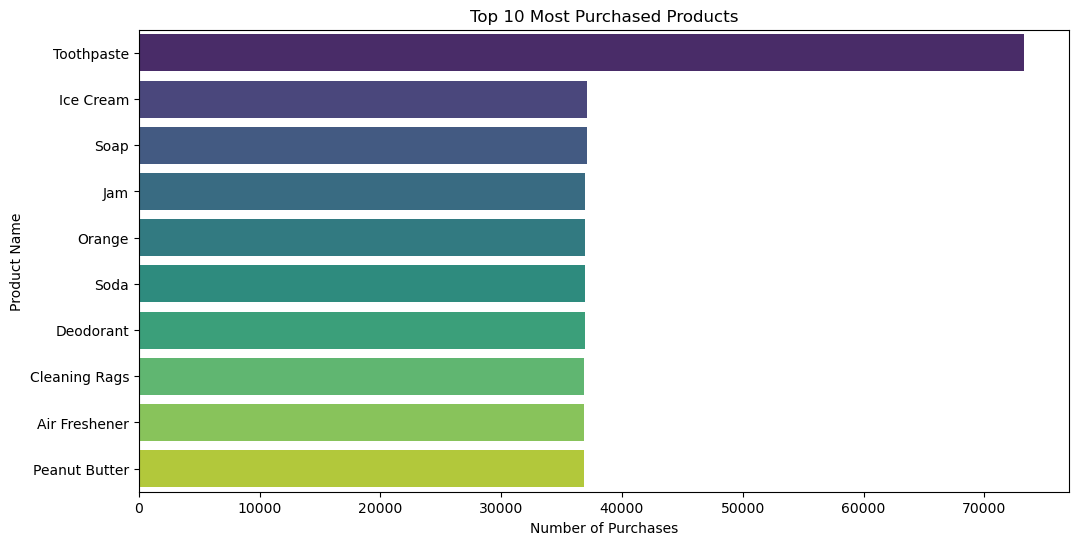

In [6]:
# Top 10 most bought product as bar chart
plt.figure(figsize=(12,6))
sns.barplot(data=product_df.head(10), x="count", y="product", hue="product", legend=False, palette="viridis")
plt.xlabel("Number of Purchases")
plt.ylabel("Product Name")
plt.title("Top 10 Most Purchased Products")
plt.show()

In [7]:
# Groups transactions by customer_name and sums their spending (Refer to sql file if needed)
customer_spending = df.groupby("customer_name")["total_cost"].sum().reset_index()

# Top 10 highest-spending customers
customer_spending.sort_values(by="total_cost", ascending=False).head(10)

,customer_name,total_cost
221493,Michael Smith,23768.53
135511,James Smith,18464.04
220934,Michael Johnson,18032.17
63727,Christopher Smith,17006.64
81402,David Smith,16547.27
221663,Michael Williams,15353.61
220942,Michael Jones,15164.54
145097,Jennifer Smith,14465.09
155835,John Smith,14285.09
220435,Michael Brown,14143.08


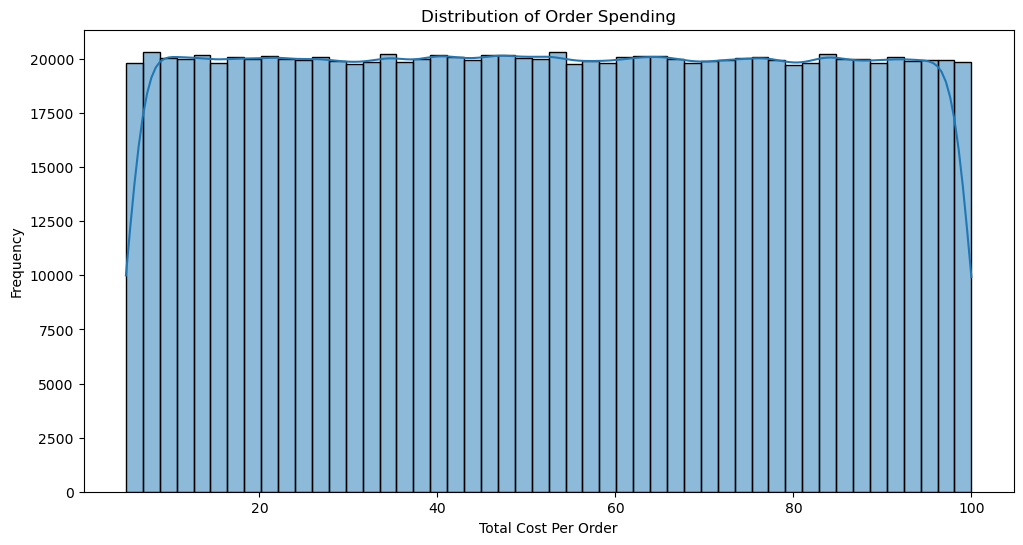

In [8]:
# Cost per orders distribution
plt.figure(figsize=(12,6))
sns.histplot(df["total_cost"], bins=50, kde=True)
plt.xlabel("Total Cost Per Order")
plt.ylabel("Frequency")
plt.title("Distribution of Order Spending")
plt.show()

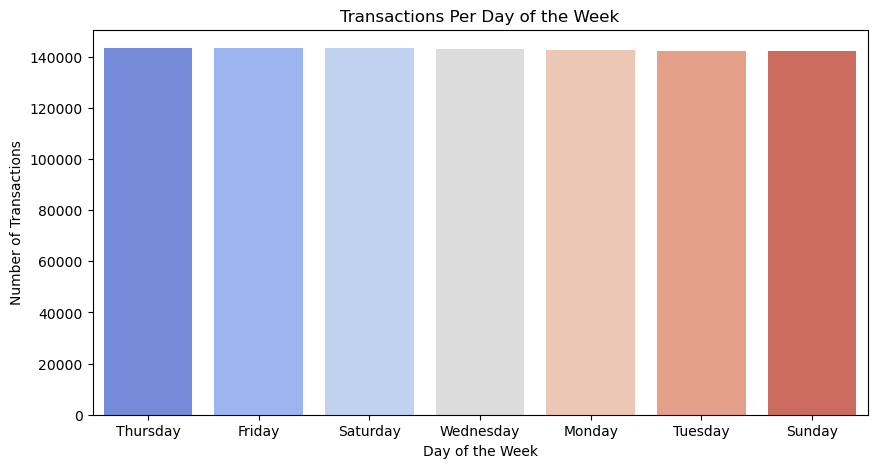

In [9]:
# Counting orders by each day
day_counts = df["day_of_week"].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=day_counts.index, y=day_counts.values, hue=day_counts.index, legend=False, palette="coolwarm")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Transactions")
plt.title("Transactions Per Day of the Week")
plt.show()

In [10]:
# Count by store type
store_type_counts = df["store_type"].value_counts()
print(store_type_counts)

store_type
Supermarket          166936
Pharmacy             166915
Convenience Store    166749
Warehouse Club       166685
Department Store     166614
Specialty Store      166101
Name: count, dtype: int64


In [11]:
# Count by payment method
payment_method_counts = df["payment_method"].value_counts()
print(payment_method_counts)

payment_method
Cash              250230
Debit Card        250074
Credit Card       249985
Mobile Payment    249711
Name: count, dtype: int64


In [13]:
print("Done with EDA")

Done with EDA
